In [74]:
import json
import requests
import pandas as pd
from pprint import pprint

In [75]:
FASTAPI = 'http://172.27.0.12:8080'
TABLES_URL = FASTAPI + '/api/tower-analytics/v1/tables'
SQL_URL = FASTAPI + '/api/tower-analytics/v1/sql'

In [76]:
rr = requests.get(TABLES_URL)
tables = rr.json()

In [77]:
print(json.dumps(sorted(set([x['table'] for x in tables])), indent=2))

[
  "cluster",
  "cluster_info",
  "cluster_system",
  "daily_event_explorer_rollup",
  "daily_job_explorer_rollup",
  "daily_job_failed_step_rollup",
  "daily_unique_hosts_rollup",
  "deprecations",
  "event_explorer_rollup",
  "host",
  "host_event_explorer_rollup",
  "host_explorer_rollup",
  "job",
  "job_events_fk",
  "job_explorer_rollup",
  "job_failed_step_rollup",
  "migrations",
  "monthly_job_explorer_rollup",
  "notification",
  "notification_arg",
  "notification_code",
  "notification_severity",
  "notification_type",
  "organization",
  "play",
  "playbook",
  "role",
  "rollup_jobs",
  "system",
  "system_info",
  "task",
  "task_action",
  "unified_jobs_fk",
  "warnings",
  "workflow_job_nodes",
  "yearly_job_explorer_rollup"
]


In [78]:
sql = 'select * from job_events_fk limit 10'
rr = requests.post(SQL_URL, json={'query': sql})
print(json.dumps(rr.json(), indent=2))

[
  {
    "system_id": 13,
    "id": 45650,
    "created": "2020-11-12T17:46:17.322752",
    "uuid": "d5f66086-1596-49ee-982f-247e97a6d0da",
    "parent_uuid": "52540073-be9c-5b0a-b3df-000000000073",
    "event": "runner_on_start",
    "task_action": 105,
    "failed": false,
    "changed": false,
    "playbook": 1,
    "play": 1,
    "task": 107,
    "role": null,
    "job_id": 9,
    "host_id": 45,
    "host_name": 2072,
    "cluster_id": 4,
    "start": null,
    "end": null,
    "duration": 0.0,
    "warnings": null,
    "deprecations": null
  },
  {
    "system_id": 13,
    "id": 45651,
    "created": "2020-11-12T17:46:17.350356",
    "uuid": "dfb65c56-5521-40f7-b30b-e440388e28c6",
    "parent_uuid": "52540073-be9c-5b0a-b3df-000000000073",
    "event": "verbose",
    "task_action": 105,
    "failed": false,
    "changed": false,
    "playbook": 1,
    "play": 1,
    "task": 107,
    "role": null,
    "job_id": 9,
    "host_id": null,
    "host_name": null,
    "cluster_id": 4,
   

In [79]:
sql = 'select DISTINCT(cluster_id, playbook, play, task, task_action) from job_events_fk'
rr = requests.post(SQL_URL, json={'query': sql})
#print(json.dumps(rr.json(), indent=2))
task_tuples = []
for x in rr.json():
    row = x['row']
    row = row.replace('(','')
    row = row.replace(')','')
    row = row.split(',')
    row = [int(col) for col in row if col]
    print(row)
    if len(row) == 5:
        task_tuples.append(row)

[1, 1, 2]
[1, 2, 5]
[1, 3, 1]
[1, 4, 9]
[1, 5]
[1, 6, 4]
[1, 7, 3]
[1, 8, 8]
[1, 9, 7]
[1, 6]
[2, 1, 2]
[2, 1, 17]
[2, 1, 45]
[2, 1, 51]
[2, 1, 82]
[2, 2, 5]
[2, 3, 1]
[2, 4, 9]
[2, 5]
[2, 6, 4]
[2, 7, 3]
[2, 8, 8]
[2, 9, 7]
[2, 10, 10]
[2, 11, 96]
[2, 12, 30]
[2, 13, 57]
[2, 14, 22]
[2, 15, 83]
[2, 16, 100]
[2, 17, 64]
[2, 18, 89]
[2, 19, 81]
[2, 20, 3]
[2, 21]
[2, 22, 42]
[2, 23, 12]
[2, 24, 48]
[2, 25]
[2, 26, 3]
[2, 28, 73]
[2, 29, 23]
[2, 30, 16]
[2, 31, 25]
[2, 32, 86]
[2, 33, 34]
[2, 34, 74]
[2, 35, 91]
[2, 36, 98]
[2, 37, 69]
[2, 38, 39]
[2, 39, 80]
[2, 40, 20]
[2, 41, 92]
[2, 42, 72]
[2, 43, 61]
[2, 44, 27]
[2, 46, 65]
[2, 47, 94]
[2, 49, 28]
[2, 50, 79]
[2, 51, 76]
[2, 52, 46]
[2, 53, 85]
[2, 55, 15]
[2, 56, 87]
[2, 57, 37]
[2, 58, 3]
[2, 59, 60]
[2, 60, 62]
[2, 61]
[2, 62, 41]
[2, 63, 93]
[2, 64, 77]
[2, 65, 84]
[2, 66, 63]
[2, 67, 3]
[2, 68, 75]
[2, 70, 54]
[2, 71, 52]
[2, 72, 95]
[2, 73, 70]
[2, 75, 26]
[2, 77, 44]
[2, 78, 97]
[2, 79, 99]
[2, 81, 53]
[2, 82, 40]
[2, 83, 36

In [80]:
pprint(task_tuples)

[[4, 1, 1, 105, 107],
 [4, 1, 1, 106, 106],
 [4, 1, 1, 107, 105],
 [4, 1, 3, 109, 106],
 [4, 1, 3, 111, 105],
 [4, 1, 3, 112, 106],
 [4, 1, 3, 112, 107],
 [4, 1, 3, 114, 106],
 [4, 1, 3, 114, 107],
 [4, 1, 4, 113, 106],
 [4, 1, 4, 113, 107]]


In [81]:
task_durations = []
for tt in task_tuples:
    sql = f"SELECT SUM(duration) FROM job_events_fk WHERE"
    sql += f" cluster_id={tt[0]} and playbook='{tt[1]}' and play='{tt[2]}'"
    sql += f" and"
    sql += f" task={tt[3]} and task_action='{tt[4]}'"
    print(sql)
    rr = requests.post(SQL_URL, json={'query': sql})
    pprint(rr.json())
    task_durations.append({'cluster_id': tt[0], 'playbook': tt[1], 'play': tt[2], 'task': tt[3], 'task_action': tt[4], 'duration': rr.json()[0]['sum']})

SELECT SUM(duration) FROM job_events_fk WHERE cluster_id=4 and playbook='1' and play='1' and task=105 and task_action='107'
[{'sum': 0.0}]
SELECT SUM(duration) FROM job_events_fk WHERE cluster_id=4 and playbook='1' and play='1' and task=106 and task_action='106'
[{'sum': 572.303679}]
SELECT SUM(duration) FROM job_events_fk WHERE cluster_id=4 and playbook='1' and play='1' and task=107 and task_action='105'
[{'sum': 864.919644999998}]
SELECT SUM(duration) FROM job_events_fk WHERE cluster_id=4 and playbook='1' and play='3' and task=109 and task_action='106'
[{'sum': 28.770883}]
SELECT SUM(duration) FROM job_events_fk WHERE cluster_id=4 and playbook='1' and play='3' and task=111 and task_action='105'
[{'sum': 40.636862}]
SELECT SUM(duration) FROM job_events_fk WHERE cluster_id=4 and playbook='1' and play='3' and task=112 and task_action='106'
[{'sum': 32.561404}]
SELECT SUM(duration) FROM job_events_fk WHERE cluster_id=4 and playbook='1' and play='3' and task=112 and task_action='107'
[{'s

In [82]:
df = pd.DataFrame.from_records(task_durations)
df.fillna(0)

,cluster_id,playbook,play,task,task_action,duration
0,4,1,1,105,107,0.000000
1,4,1,1,106,106,572.303679
2,4,1,1,107,105,864.919645
3,4,1,3,109,106,28.770883
4,4,1,3,111,105,40.636862
5,4,1,3,112,106,32.561404
6,4,1,3,112,107,0.000000
7,4,1,3,114,106,33.321201
8,4,1,3,114,107,0.000000
9,4,1,4,113,106,476.373247


<AxesSubplot:ylabel='Frequency'>

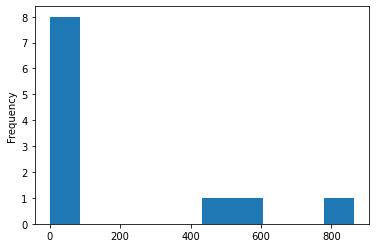

In [83]:
df['duration'].plot(kind='hist')

In [84]:
sql = "select task,host_id,duration from job_events_fk where task=113 and cluster_id=4"
rr = requests.post(SQL_URL, json={'query': sql})
pprint(sorted(rr.json(), key=lambda x: x['duration'], reverse=True))

[{'duration': 23.392706, 'host_id': 52, 'task': 113},
 {'duration': 9.522195, 'host_id': 102, 'task': 113},
 {'duration': 9.242093, 'host_id': 37, 'task': 113},
 {'duration': 9.235085, 'host_id': 72, 'task': 113},
 {'duration': 9.230446, 'host_id': 95, 'task': 113},
 {'duration': 9.227677, 'host_id': 26, 'task': 113},
 {'duration': 9.225461, 'host_id': 94, 'task': 113},
 {'duration': 9.21746, 'host_id': 60, 'task': 113},
 {'duration': 9.217139, 'host_id': 36, 'task': 113},
 {'duration': 9.210694, 'host_id': 74, 'task': 113},
 {'duration': 9.21009, 'host_id': 100, 'task': 113},
 {'duration': 9.20945, 'host_id': 62, 'task': 113},
 {'duration': 9.209038, 'host_id': 63, 'task': 113},
 {'duration': 9.208863, 'host_id': 78, 'task': 113},
 {'duration': 8.231382, 'host_id': 89, 'task': 113},
 {'duration': 8.229311, 'host_id': 68, 'task': 113},
 {'duration': 8.215148, 'host_id': 29, 'task': 113},
 {'duration': 8.214619, 'host_id': 35, 'task': 113},
 {'duration': 8.211778, 'host_id': 99, 'task':

<AxesSubplot:ylabel='Frequency'>

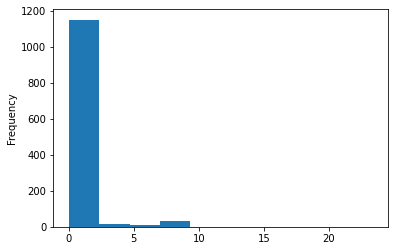

In [85]:
df = pd.DataFrame(rr.json())
df['duration'].plot(kind='hist')

In [86]:
sql = "select * from host where id=52"
rr = requests.post(SQL_URL, json={'query': sql})
pprint(rr.json())

[{'hash': 'FEhTCyX3aCE6k9oE60u-r0EivbYC2kPhJ1ywemS4rDrErM9-yo4XMvExVwDpCn3aqgOPKU36o2c5iVdYDKfdww==',
  'id': 52,
  'name': 'host_name_293'}]
